# # Classifiers comparison on texts with naive Bayes assumption

In this session of laboratory we compare two models for categorical data probabilistic modeling: 
1. multivariate Bernoulli 
2. multinomial on a dataset 

We adopt a dataset on Twitter messages labelled with emotions (Joy vs Sadness).

The following program shows the loading of the data from a file.

Data are loaded into a matrix X adopting a sparse matrix representation, in order to save space and time.
Sparse matrix representation (in the csr format) represents in three "parallel" arrays the value of the matrix cells that are different from zero and the indices of those matrix cells.
The arrays are called: 
- data
- row
- col

- data[i] stores the value of the matrix cell #i whose indexes are contained in row[i] and col[i] 
- row[i] stores the index of the row in the matrix of the cell #i, 
- col[i] stores the index of the column of the cell #i.


The data file is in csv format.
Any Twitter message has been preprocessed by a Natural Language pipeline which eliminated stop words and substituted the interesting document elements with an integer identifier.  
The interesting document elements might be words, emoji or emoticons. The elements could be repeated in the same document and are uniquely identified in the documents by the same integer number.

Each row of the dataset is a list of integer number pairs, followed by a string which is the label of the document (Joy or sadness).
The first number of the pair is an identifier of an element (word, emoji or emoticon) and the second number of the pair is the count (frequency) of that element in that document.

The dataset has:
tot_n_docs=n_rows=11981
n_features (document elements)=11288



The following program reads the data file and loads in a sparse way the matrix using the scipy.sparse library

In [2]:
from numpy import ndarray, zeros
import numpy as np
import scipy
from scipy import stats
from scipy.sparse import csr_matrix

class_labels = ["Joy","Sadness"]
n_features=11288 # number of columns in the matrix = number of features (distinct elements in the documents)
n_rows=11981 # number rows of the matrix
n_elements=71474 # number of the existing values in the matrix (not empty, to be loaded in the matrix in a sparse way)

#path_training="/Users/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
path_training="./Datasets for Naive Bayes Classification/"
file_name="joy_sadness6000.txt"

# declare the row and col arrays with the indexes of the matrix cells (non empty) to be loaded from file
# they are needed because the matrix is sparse and we load in the matrix only the elements which are present
row=np.empty(n_elements, dtype=int)
col=np.empty(n_elements, dtype=int)
data=np.empty(n_elements, dtype=int)

row_n=0 # number of current row to be read and managed
cur_el=0 # position in the arrays row, col and data
twitter_labels=[] # list of class labels (target array) of the documents (twitter) that will be read from the input file
twitter_target=[] # list of 0/1 for class labels
with open(path_training + file_name, "r") as fi:
    for line in fi:
        el_list=line.split(',')
        l=len(el_list)
        last_el=el_list[l-1] # I grab the last element in the list which is the class label
        class_name=last_el.strip() # eliminate the '\n'
        twitter_labels.append(class_name)
        # twitter_labels contains the labels (Joy/Sadness); twitter_target contains 0/1 for the respective labels
        if (class_name==class_labels[0]):
           twitter_target.append(0)
        else:
           twitter_target.append(1)
        i=0 # I start reading all the doc elements from the beginning of the list
        while(i<(l-1)):
            element_id=int(el_list[i]) # identifier of the element in the document
            element_id=element_id-1 # the index starts from 0 (the read id starts from 1)
            i=i+1
            value_cell=int(el_list[i]) # make access to the following value in the file which is the count of the element in the documento 
            i=i+1
            row[cur_el]=row_n # load the data in the three arrays: the first two are the row and col indexes; the last one is the matrix cell value
            col[cur_el]=element_id
            data[cur_el]=value_cell
            cur_el=cur_el+1
        row_n=row_n+1
fi.close
print("final n_row="+str(row))
# loads the matrix by means of the indexes and the values in the three arrays just filled
twitter_data=csr_matrix((data, (row, col)), shape=(n_rows, n_features)).toarray()
print("resulting matrix:")
print(twitter_data)
print(twitter_labels)
print(twitter_target)


final n_row=[0 0 0 ... 0 0 0]
resulting matrix:
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
['Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy', 'Joy'

Write a program in the following cell that splits the data matrix in training and test set (by random selection) and predicts the class (Joy/Sadness) of the messages on the basis of the words. 
Consider the two possible models:
multivariate Bernoulli and multinomial Bernoulli.
Find the accuracy of the models and test is the observed differences are significant.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#splitting dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(twitter_data, twitter_labels, test_size=.10, random_state = 42)

In [4]:
from sklearn.naive_bayes import MultinomialNB
clf_multinomial = MultinomialNB()
clf_multinomial.fit(X_train, y_train)
y_predicted = clf_multinomial.predict(X_test) 
score = clf_multinomial.score(X_test, y_test)
scores_a = cross_val_score(clf_multinomial, X_train, y_train, cv=10)
print(scores_a)
print(score)

[0.93883225 0.96200185 0.9554731  0.94526902 0.95454545 0.93970315
 0.95918367 0.95176252 0.95083488 0.9471243 ]
0.9491242702251876


In [5]:
from sklearn.naive_bayes import BernoulliNB
clf_multivariate = BernoulliNB()
clf_multivariate.fit(X_train, y_train)
y_predicted = clf_multivariate.predict(X_test) 
score = clf_multivariate.score(X_test, y_test)
scores_b = cross_val_score(clf_multivariate, X_train, y_train, cv=10)
print(scores_b)
print(score)

[0.9416126  0.96107507 0.96011132 0.94990724 0.95732839 0.94155844
 0.96011132 0.95269017 0.9554731  0.94897959]
0.9499582985821518


In [6]:
# H0 - Null hypothesis: identical average scores
# If p-value > 0.05 then we cannot reject H0
t2, p2 = stats.ttest_ind(scores_a, scores_b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -0.716580574078993
p = 0.4828277738610125


In [7]:
numb_splits = 50
bins = np.linspace(0.1, 0.99, numb_splits)
p_values = list()
for i in range(len(bins)):
    X_train, X_test, y_train, y_test = train_test_split(twitter_data, twitter_labels, test_size=bins[i], random_state = 42)
    clf_multinomial.fit(X_train, y_train)
    y_predicted = clf_multinomial.predict(X_test) 
    score = clf_multinomial.score(X_test, y_test)
    scores_a = cross_val_score(clf_multinomial, X_train, y_train, cv=10)
    clf_multivariate.fit(X_train, y_train)
    y_predicted = clf_multivariate.predict(X_test) 
    score = clf_multivariate.score(X_test, y_test)
    scores_b = cross_val_score(clf_multivariate, X_train, y_train, cv=10)
    t2, p2 = stats.ttest_ind(scores_a, scores_b)
    p_values.append(p2) 
print("----")

----


P-value: [0.0489, 0.048, 0.0007, 0.0]


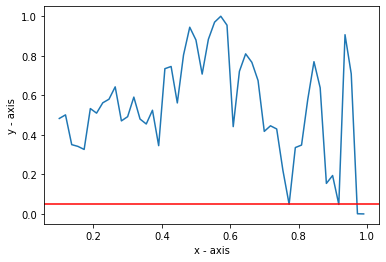

In [8]:
import matplotlib.pyplot as plt 
print("P-value: "+str([round(num, 4) for num in p_values if num <= 0.05]))
f = plt.figure()
plt.plot(bins, p_values) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.axhline(y=0.05, color='r', linestyle='-')
plt.show() 
f.savefig("p_val.pdf", bbox_inches='tight')